In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  
from scipy.stats import norm
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('BTC-USD.csv',index_col='Date',parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-23,13948.700195,15603.200195,13828.799805,14699.200195,14699.200195,13086000128
2017-12-24,14608.200195,14626.000000,12747.700195,13925.799805,13925.799805,11572299776
2017-12-25,13995.900391,14593.000000,13448.900391,14026.599609,14026.599609,10664699904
2017-12-26,14036.599609,16461.199219,14028.900391,16099.799805,16099.799805,13454300160
2017-12-27,16163.500000,16930.900391,15114.299805,15838.500000,15838.500000,12487600128


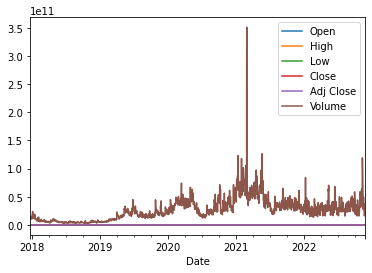

In [4]:
df.plot()

In [53]:
# train-test split
Ntest=10
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [63]:
Log_return = np.log(1 + train['Close'].pct_change()) 

drift = np.array(Log_return.mean() - (Log_return.var() / 2.0))
num_of_prediction_days = 11 
paths = 5000

std = np.array(Log_return.std())

Random_var = np.array(Log_return.std()) * norm.ppf(np.random.rand(num_of_prediction_days, paths)) # Calculating Rv

print(Random_var)

[[ 0.01370129  0.00321071 -0.06475558 ... -0.01223686 -0.02539986
  -0.00031133]
 [-0.03685363 -0.03612905  0.0266662  ...  0.02510037  0.06125682
   0.03231195]
 [-0.01077272  0.02603514 -0.02954752 ... -0.02839875 -0.01975854
   0.0204011 ]
 ...
 [-0.00708918 -0.04968522 -0.01914018 ... -0.04813797  0.03430596
   0.03099866]
 [-0.00422358 -0.03175399  0.00172499 ...  0.01086334  0.02216061
  -0.08183876]
 [ 0.07536595  0.03476051 -0.06148007 ...  0.04696062 -0.03268227
   0.00446004]]


The Minimum Predicted Price: 10359.000468635772
The Maximum Predicted Price: 26587.527595654996
The Mean Predicted Price: 16830.338683022244


 ...]

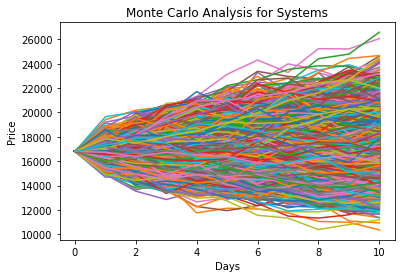

In [64]:
predicted_prices = np.zeros_like(np.exp(drift + Random_var)) 
predicted_prices[0] = train['Close'].iloc[-1]
# Loop over all the days to find their prices & Calculating the future price with formula
for i in range(1, num_of_prediction_days): 
    predicted_prices[i] = predicted_prices[i - 1] * np.exp(drift + Random_var)[i] 

print("The Minimum Predicted Price:", predicted_prices[num_of_prediction_days-1].min()) 
print("The Maximum Predicted Price:", predicted_prices[num_of_prediction_days-1].max()) 
print("The Mean Predicted Price:", predicted_prices[num_of_prediction_days-1].mean())
plt.xlabel('Days') 
plt.ylabel('Price') 
plt.title('Monte Carlo Analysis for Systems') 
plt.plot(predicted_prices)



In [65]:
test_pred=[]
for i in range(predicted_prices.shape[0]):
  test_pred.append(predicted_prices[i].mean())

In [66]:
test_pred

[16799.185547,
 16788.051843750694,
 16778.383975678724,
 16805.33882578501,
 16799.598435748914,
 16798.171138390557,
 16811.731215589654,
 16800.40177403256,
 16812.2638001305,
 16820.852629726247,
 16830.338683022244]

In [67]:
y_true=test['Close'].values
y_true

array([16353.365234, 16618.199219, 16884.613281, 16669.439453,
       16687.517578, 16697.777344, 16711.546875, 16291.832031,
       15787.28418 , 16189.769531])

In [68]:
test_pred[1:]

[16788.051843750694,
 16778.383975678724,
 16805.33882578501,
 16799.598435748914,
 16798.171138390557,
 16811.731215589654,
 16800.40177403256,
 16812.2638001305,
 16820.852629726247,
 16830.338683022244]

In [69]:
rmse = np.sqrt(mean_squared_error(np.log(y_true),np.log(test_pred[1:])))
print(rmse)

0.02738033501605745
